In [5]:
from google.colab import files
uploaded = files.upload()


Saving electricity.csv to electricity.csv


In [6]:
import os
print(os.listdir())

['.config', 'electricity.csv', 'sample_data']


In [7]:
import pandas as pd

df = pd.read_csv("electricity.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])

df.head()


,timestamp,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
0,2016-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
1,2016-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2,2016-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
3,2016-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
4,2016-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486


In [8]:
building = df.columns[5]
print("Selected building:", building)

data = df[['timestamp', building]].dropna()
data.head()


Selected building: Panther_education_Teofila


,timestamp,Panther_education_Teofila
0,2016-01-01 00:00:00,0.0
1,2016-01-01 01:00:00,0.0
2,2016-01-01 02:00:00,0.0
3,2016-01-01 03:00:00,0.0
4,2016-01-01 04:00:00,0.0


In [9]:
print("Min:", data[building].min())
print("Max:", data[building].max())
print("Mean:", data[building].mean())
print("Non-zero count:", (data[building] > 0).sum())


Min: 0.0
Max: 375.0384
Mean: 126.32954058061942
Non-zero count: 14156


In [10]:
from sklearn.ensemble import IsolationForest

X = data[[building]]

iso = IsolationForest(
    n_estimators=100,
    contamination=0.01,
    random_state=42
)

iso.fit(X)

data['anomaly_if'] = iso.predict(X)
data['anomaly_if'] = data['anomaly_if'].map({-1: 1, 1: 0})

data.head()


,timestamp,Panther_education_Teofila,anomaly_if
0,2016-01-01 00:00:00,0.0,0
1,2016-01-01 01:00:00,0.0,0
2,2016-01-01 02:00:00,0.0,0
3,2016-01-01 03:00:00,0.0,0
4,2016-01-01 04:00:00,0.0,0


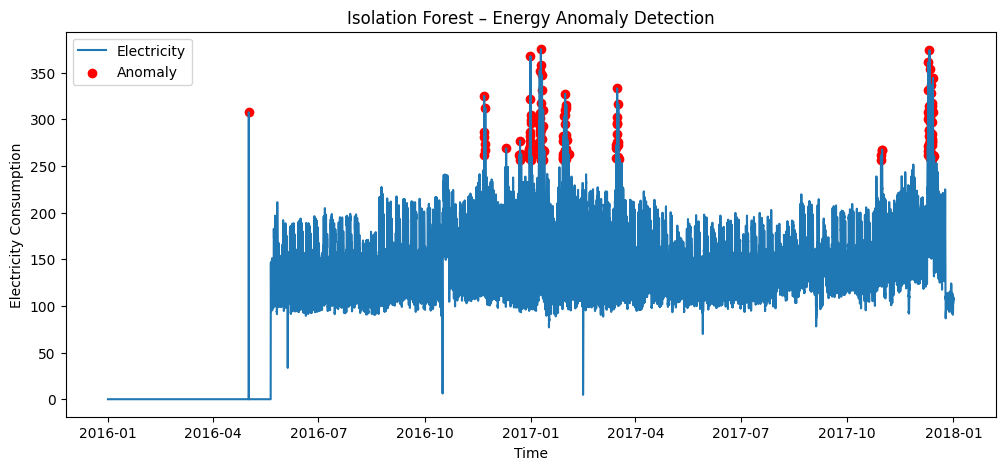

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(data['timestamp'], data[building], label='Electricity')

plt.scatter(
    data[data['anomaly_if'] == 1]['timestamp'],
    data[data['anomaly_if'] == 1][building],
    color='red',
    label='Anomaly'
)

plt.title('Isolation Forest – Energy Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.show()


In [13]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(kernel='rbf', nu=0.01)
svm.fit(X)

data['anomaly_svm'] = svm.predict(X)
data['anomaly_svm'] = data['anomaly_svm'].map({-1: 1, 1: 0})


In [14]:
data.to_csv("ml_anomaly_results.csv", index=False)


In [15]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(kernel='rbf', nu=0.01)
svm.fit(X)

data['anomaly_svm'] = svm.predict(X)
data['anomaly_svm'] = data['anomaly_svm'].map({-1: 1, 1: 0})


In [16]:
data.to_csv("ml_anomaly_results.csv", index=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')